## Data Cleaning and merging dataframes

In this notebook, we'll work with `movie_basic`s and `movie_ratings` tables from `'im.db'`. As well as `'tn.movie_budget.csv'`.

Before we can get going, we'll need to import the relevant packages and conncet to the database.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
conn = sqlite3.connect('Data/im.db')

In this notebook we'll focus on the `movie_basics` and `movie_ratings`.

## Compared to the Individual Tables:

### `movie_basics` Table:

In [14]:
q = """
SELECT
    movie_id, 
    primary_title,
    original_title,
    start_year,
    runtime_minutes,
    genres
FROM movie_basics
"""
pd.read_sql(q, conn).head(5)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


### `movie_ratings` Table:

In [15]:
q = """
SELECT
    movie_id,
    averagerating,
    numvotes
FROM movie_ratings
"""
pd.read_sql(q, conn).head(5)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [16]:
# 

In [17]:
q = """
SELECT
    movie_id, 
    primary_title,
    genres,
    averagerating,
    numvotes
FROM movie_basics
JOIN movie_ratings
    USING (movie_id)
"""
df = pd.read_sql(q, conn)
df.shape

(73856, 5)

In [18]:
# 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   primary_title  73856 non-null  object 
 2   genres         73052 non-null  object 
 3   averagerating  73856 non-null  float64
 4   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 2.8+ MB


In [19]:
# Count null values
df.isna().sum()

movie_id           0
primary_title      0
genres           804
averagerating      0
numvotes           0
dtype: int64

In [20]:
# Since the genre is a categorical data and the missing values accounts for 
# only 1 % (800/73856) of our total data we decided to drop rows that 
# contained null values
df_nonull_genres = df.dropna(axis = 0)

In [21]:
# Count null values
df_nonull_genres.isna().sum()

movie_id         0
primary_title    0
genres           0
averagerating    0
numvotes         0
dtype: int64

# tn.movie_budgets.csv

In [22]:
movie_budget = pd.read_csv('Data/tn.movie_budgets.csv')
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [23]:
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [24]:
# 
df_nonull_genres.rename(columns={'primary_title' : 'movie'}, inplace = True)

C:\Users\mervela\AppData\Local\Temp\ipykernel_16988\174632230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonull_genres.rename(columns={'primary_title' : 'movie'}, inplace = True)


In [25]:
#
df_nonull_genres.columns

Index(['movie_id', 'movie', 'genres', 'averagerating', 'numvotes'], dtype='object')

In [26]:
im_movie_budget = pd.merge(df_nonull_genres ,movie_budget, on='movie', how='left', indicator = 'im_and_movie_budget')

In [27]:
im_movie_budget['im_and_movie_budget'].value_counts()

left_only     70307
both           2867
right_only        0
Name: im_and_movie_budget, dtype: int64

In [28]:
cleaned_df = im_movie_budget[im_movie_budget['im_and_movie_budget'] == 'both'] 
cleaned_df

,movie_id,movie,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,im_and_movie_budget
16,tt0249516,Foodfight!,"Action,Animation,Comedy",1.9,8248,26.0,"Dec 31, 2012","$45,000,000",$0,"$73,706",both
36,tt0337692,On the Road,"Adventure,Drama,Romance",6.1,37886,17.0,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302",both
42,tt0359950,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",7.3,275300,37.0,"Dec 25, 2013","$91,000,000","$58,236,838","$187,861,183",both
46,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,105116,67.0,"Sep 19, 2014","$28,000,000","$26,017,685","$62,108,587",both
47,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",7.0,539338,34.0,"Jun 12, 2015","$215,000,000","$652,270,625","$1,648,854,864",both
...,...,...,...,...,...,...,...,...,...,...,...
72971,tt9746500,Earth,Documentary,7.3,49,36.0,"Apr 22, 2009","$47,000,000","$32,011,576","$116,773,317",both
73096,tt9851050,Sisters,"Action,Drama",4.7,14,57.0,"Dec 18, 2015","$30,000,000","$87,044,645","$106,030,660",both
73111,tt9861522,Ali,Drama,7.7,79,45.0,"Dec 25, 2001","$109,000,000","$58,183,966","$87,683,966",both
73151,tt9899880,Columbus,Comedy,5.8,5,93.0,"Aug 4, 2017","$700,000","$1,017,107","$1,110,511",both


In [29]:
# 
cleaned_df.isna().sum()

movie_id               0
movie                  0
genres                 0
averagerating          0
numvotes               0
id                     0
release_date           0
production_budget      0
domestic_gross         0
worldwide_gross        0
im_and_movie_budget    0
dtype: int64

In [30]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2867 entries, 16 to 73164
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   movie_id             2867 non-null   object  
 1   movie                2867 non-null   object  
 2   genres               2867 non-null   object  
 3   averagerating        2867 non-null   float64 
 4   numvotes             2867 non-null   int64   
 5   id                   2867 non-null   float64 
 6   release_date         2867 non-null   object  
 7   production_budget    2867 non-null   object  
 8   domestic_gross       2867 non-null   object  
 9   worldwide_gross      2867 non-null   object  
 10  im_and_movie_budget  2867 non-null   category
dtypes: category(1), float64(2), int64(1), object(7)
memory usage: 249.3+ KB


In [31]:
#For business case #1: (Juan & Mercedez)
    #1. First we will need to identify genre types() 
    #2. Then we can create a table with Movie title and genre and profits 
        #2.5 create another table comparing genre and domestic vs worldwide profits 
            #3. Create bar graph for the table above^
    #4. Then find the statistical correlation between genre and worldwide gross profits
    #5. Recommend type of genre based off of statistical findings 

#For business case #2: (Mercedez & Jordan) 
    #1: Organize release_date by seasons () / month() /holiday***
    #2: Count() of movies produced at each season
    #3: Graph Release data using histogram/bar
    #4: Count() profit of each seasons
    #5 Graph
    #6 Analyze correlation between season vs profit
    #7: Count() ppopulartiy of each seasons
    #8 Graph
    #9 Analyze correlation between season vs popularity
    #10 Find correlation between seasons vs popularity vs profit 
    #11 Recommendations

In [32]:
#Business Case #1 
#Juan & Mercedez 
#Creating a table with Movie Title, genres and profits
case1_df = cleaned_df.loc[:,['movie','genres','worldwide_gross']]
print(case1_df)

                                 movie                   genres  \
16                          Foodfight!  Action,Animation,Comedy   
36                         On the Road  Adventure,Drama,Romance   
42     The Secret Life of Walter Mitty   Adventure,Comedy,Drama   
46         A Walk Among the Tombstones       Action,Crime,Drama   
47                      Jurassic World  Action,Adventure,Sci-Fi   
...                                ...                      ...   
72971                            Earth              Documentary   
73096                          Sisters             Action,Drama   
73111                              Ali                    Drama   
73151                         Columbus                   Comedy   
73164                      Unstoppable              Documentary   

      worldwide_gross  
16            $73,706  
36         $9,313,302  
42       $187,861,183  
46        $62,108,587  
47     $1,648,854,864  
...               ...  
72971    $116,773,317  
730

In [33]:
#Business Case #1 
#Juan, Jordan, Mercedez
#Dividing all of the genres
genres_cols = cleaned_df['genres'].str.split(',', expand=True)
genres_cols.columns = ['genre1','genre2','genre3']
counts1 = genres_cols['genre1'].value_counts()
counts2 = genres_cols['genre2'].value_counts()
counts3 = genres_cols['genre3'].value_counts()
total_counts = counts1.add(counts2, fill_value=0).add(counts3, fill_value=0)
total_counts

Action          630.0
Adventure       448.0
Animation       130.0
Biography       195.0
Comedy          758.0
Crime           362.0
Documentary     204.0
Drama          1491.0
Family          144.0
Fantasy         175.0
History          71.0
Horror          360.0
Music            72.0
Musical          22.0
Mystery         223.0
News              3.0
Romance         326.0
Sci-Fi          204.0
Sport            62.0
Thriller        509.0
War              39.0
Western          16.0
dtype: float64

In [34]:
#Business Case #1 
#Juan 
#Creating a new table with number of gender, 
case1_vs_df = pd.merge(cleaned_df[['movie','domestic_gross','worldwide_gross']], genres_cols[['genre1','genre2','genre3']], left_index = True, right_index=True)
case1_vs_df

,movie,domestic_gross,worldwide_gross,genre1,genre2,genre3
16,Foodfight!,$0,"$73,706",Action,Animation,Comedy
36,On the Road,"$720,828","$9,313,302",Adventure,Drama,Romance
42,The Secret Life of Walter Mitty,"$58,236,838","$187,861,183",Adventure,Comedy,Drama
46,A Walk Among the Tombstones,"$26,017,685","$62,108,587",Action,Crime,Drama
47,Jurassic World,"$652,270,625","$1,648,854,864",Action,Adventure,Sci-Fi
...,...,...,...,...,...,...
72971,Earth,"$32,011,576","$116,773,317",Documentary,None,None
73096,Sisters,"$87,044,645","$106,030,660",Action,Drama,None
73111,Ali,"$58,183,966","$87,683,966",Drama,None,None
73151,Columbus,"$1,017,107","$1,110,511",Comedy,None,None


#Business Case #1 
#Juan & Jordan
#Delete the $ and ,
#case1_vs_df['domestic_gross'] = case1_vs_df['domestic_gross'].replace({'\$':'',',':''},regex=True)
#case1_vs_df['worldwide_gross'] = case1_vs_df['worldwide_gross'].replace({'\$':'',',':''},regex=True)
#case1_vs_df

#case1_vs_df['domestic_gross'] = case1_vs_df['domestic_gross'].astype(float)
#case1_vs_df['worldwide_gross'] = case1_vs_df['worldwide_gross'].astype(float) totals = {} for index, row in case1_vs_df.iterrows():
    #genres = [row['genre1'], row['genre2'], row['genre3']]
    #for genre in genres:
        #if genre not in totals:
            #totals[genre] = {'domestic_gross': 0, 'worldwide_gross': 0}
       # totals[genre]['domestic_gross'] += row['domestic_gross']
       # totals[genre]['worldwide_gross'] += row['worldwide_gross'] new_df = pd.DataFrame(totals).T.reset_index().rename(columns={'index': 'genre'}) new_df



#Business Case #1 
#Juan 
#Creating a bar graph for the case1_vs_df table #Defining the columns of the x and y axis
x = new_df['genre']
y1 = new_df['domestic_gross']
y2 = new_df['worldwide_gross']
plt.figure(figsize=(50,40))
plt.xticks(fontsize=20)
plt.yticks(fontsize=25)
plt.bar(x,y1,label='Domestic Gross')
#Defining name of the labels and title of the bar graph
plt.bar(x,y2,bottom=y1,label='Worldwide Gross')
plt.title('Gross by genre', fontsize=35)
plt.xlabel('Genre', fontsize=35)
plt.ylabel('Gross in billion', fontsize=35)
plt.legend(fontsize=35)
plt.show()

In [35]:
#Business case #2
#Count total movies in each season
#Jordan
seasons_dict = {'Spring': ['Mar','Apr','May'], 'Summer': ['Jun','Jul','Aug',], 'Fall': ['Sep','Oct','Nov'], 'Winter': ['Dec','Jan','Feb']}

cleaned_df['release_date']

season_dict = {'Spring':0,'Summer':0,'Fall':0,'Winter':0,}

for i in cleaned_df['release_date']:
    x = i.split(' ')
    for key,val in seasons_dict.items():
        if x[0] in val:
            season_dict[key]+=1
    
season_dict

{'Spring': 673, 'Summer': 682, 'Fall': 751, 'Winter': 761}

Text(0.5, 1.0, 'Distribution of Movies by Season')

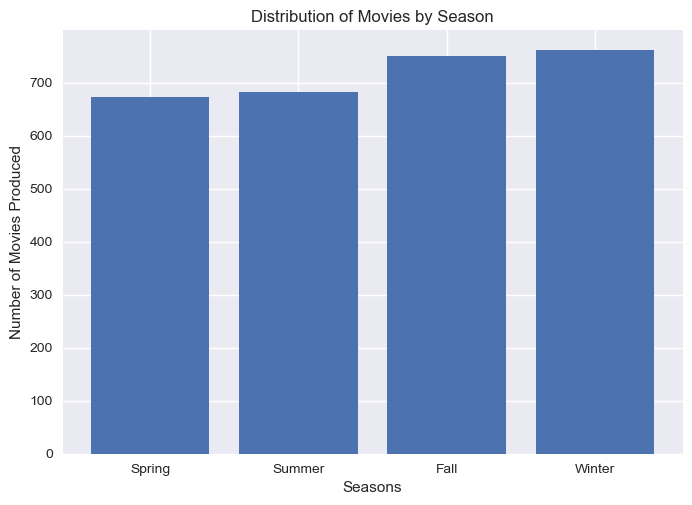

In [36]:
#Business case #2
#Bar Chart
#Jordan
fig, ax = plt.subplots()

ax.bar(season_dict.keys(),season_dict.values())
ax.set_xlabel('Seasons')
ax.set_ylabel('Number of Movies Produced')
ax.set_title('Distribution of Movies by Season')

In [37]:
#Business case #2 
#I'm trying to count the total profit, both domestic and worldwide, for each season(s) 
#Mercedez & Jordan
seasons = {'Spring': ['Mar','Apr','May'], 'Summer': ['Jun','Jul','Aug',], 'Fall': ['Sep','Oct','Nov'], 'Winter': ['Dec','Jan','Feb']}

test = {'Spring':0,'Summer':0,'Fall':0,'Winter':0,}
def get_season(x):
    for key,val in seasons.items():
        if x[0] in val:
            return key
#This is for gross domestic        
for i in cleaned_df.itertuples():
    date = i[7]
    x=i[7].split(' ')
    y=get_season(x)
    num = i[9].replace('$','').replace(',','')
    test[y]+=int(num)
print('gross domestic', test)   

gross_worldwide = {'Spring':0,'Summer':0,'Fall':0,'Winter':0,}
#This is for gross worldwide    
for i in cleaned_df.itertuples():
    date = i[7]
    x=i[7].split(' ')
    y=get_season(x)
    num = i[10].replace('$','').replace(',','')
    gross_worldwide[y]+=int(num)
print('gross worldwide', gross_worldwide)

gross domestic {'Spring': 32267117335, 'Summer': 35185851273, 'Fall': 26847802292, 'Winter': 29023623325}
gross worldwide {'Spring': 79989060868, 'Summer': 83425075374, 'Fall': 65576756077, 'Winter': 65967303186}


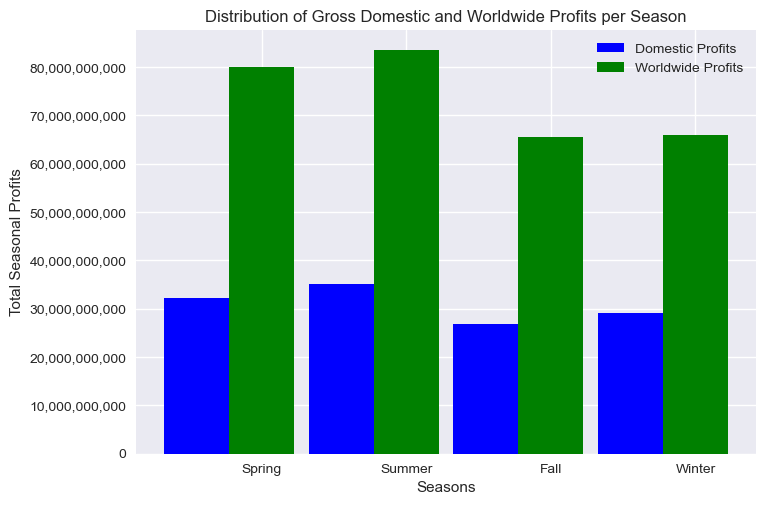

In [38]:
#Business Case #2
#Bar Chart for the categorical data of seasons and profits
#Mercedez & Jordan
import matplotlib as mpl
fig, ax = plt.subplots()
X = ['Spring','Summer','Fall','Winter'] #x values manually entered

ind = np.arange(len(season_dict.keys()))
N = 2 #num of bars
width = 0.45 # the width of the bars

rects1 = ax.bar(ind,test.values(), width, color='b')
rects2 = ax.bar(ind+width,gross_worldwide.values(), width, color='g')

ax.set_xlabel('Seasons')
ax.set_ylabel('Total Seasonal Profits')
ax.set_title('Distribution of Gross Domestic and Worldwide Profits per Season')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xticks(ind+width, ('Spring', 'Summer', 'Fall', 'Winter') )
ax.legend( (rects1[0], rects2[0]), ('Domestic Profits', 'Worldwide Profits') )

# def autolabel(rects):
#     for rect in rects:
#         h = rect.get_height()
#         ax.text(rect.get_x()+rect.get_width()/1.10, 1.00*h, '%d'%int(h),
#                 ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)

In [39]:
#Business case #2
#Full Statistical Analysis 
#Mercedez

Statistical Analysis 
    - Null hypothesis: There is no difference between the seasonal release date and gross worldwide profits. 
    - Alternative hypothesis: There is a difference between the seasonal release date and gross worldwide profits, the sample mean for gross worldwide profits is higher in the Summer season than other seasons.
    - The why: We are choosing to predict that the Summer season release date for a movie will yeild higher gross worldwide profits, being that people have more free time and therefore plan for more entertainment, as well as seek indoor venues to escape high Summer temperatures. 
    - We are then choosing to conduct a one-tailed Z-Test to calculate the statistical significance for this one direction (greater than value). 
    - Our significance level (alpha) is 0.05, indicating a 5% risk of concluding that a difference exists when there is no actual difference.

In [49]:
#Code for z-test statistical analysis 
#Mercedez
import scipy.stats as stats
from math import sqrt

print('Total profits:',gross_worldwide['Summer'])

summer_list = []
winter_list=[]
fall_list=[]
spring_list=[]

for i in cleaned_df.itertuples():
    x= i[7].split(' ')
    key = get_season(x)
    num = i[9].replace('$','').replace(',','')
    if key == 'Summer':
        summer_list.append(int(num))
    if key == 'Winter':
        winter_list.append(int(num))
    if key == 'Fall':
        fall_list.append(int(num))
    if key == 'Spring':
        spring_list.append(int(num))
        
print('Sample Mean:', np.mean(summer_list)) 
#print('Sample Number:', len(summer_list)) 

x_bar = np.mean(summer_list) #sample mean 
n = 4 # number of seasons in a year
sigma = np.std(summer_list + winter_list + fall_list + spring_list) #sd of population
mu = (np.mean(summer_list) + np.mean(winter_list) + np.mean(fall_list) + np.mean(spring_list))/4 # Population mean 
print('Population Mean:',mu)

z = (x_bar - mu)/(sigma/(sqrt(n)))
                  
print('Z-Score:',z)

Total profits: 83425075374
Sample Mean: 51592157.29178885
Population Mean: 43356388.302691706
Z-Score: 0.2208090405003963


In [41]:
#stats.norm.cdf(z)

In [42]:
pval = 1 - stats.norm.cdf(z)
pval

0.4223357081585144

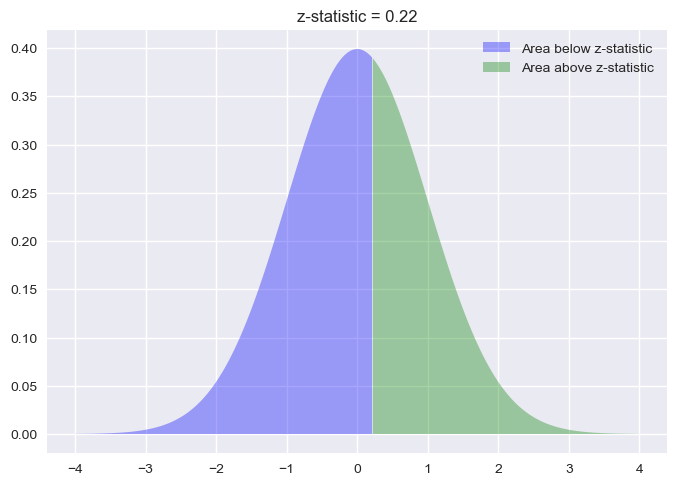

In [51]:
#plot of value on a standard normal distribution
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')
plt.fill_between(x=np.arange(-4,0.22,0.01),
                 y1= stats.norm.pdf(np.arange(-4,0.22,0.01)) ,
                 facecolor='blue',
                 alpha=0.35,
                 label= 'Area below z-statistic'
                 )

plt.fill_between(x=np.arange(0.22,4,0.01), 
                 y1= stats.norm.pdf(np.arange(0.22,4,0.01)) ,
                 facecolor='green',
                 alpha=0.35, 
                 label= 'Area above z-statistic')
plt.legend()
plt.title ('z-statistic = 0.22');